In [134]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [135]:
#Load csv data
df=pd.read_csv("C:/Users/HP/Desktop/Shana/data science/archive/Instagram data.csv",encoding='latin-1')

In [136]:
# Basic inspection
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

(119, 13)
   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a mach

In [137]:
# Check duplicates
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)
print(f"Duplicated rows are:{df.duplicated().sum()}")
#Drop duplicate rows
df=df.drop_duplicates()


    Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
15         5055       2017           2351           298         108    101   
16         4002       3401            278           128          73    111   
17         3169       1979            707           341          32    106   
18         6168       2177           3450           153         296     82   
19         2407       1338            655           276          39     40   
23         3052       2608            201           121          87     63   
24         4628       2406           1260           861          26    144   
25         4082       2195           1248           541          36    135   
26         5394       2275           2975            45          65     61   
27         2766       2541            116            51           9     40   
28         3924       2244           1278           326          34    139   
29         3015       2034            771           115         

In [138]:
df.shape

(102, 13)

In [ ]:
# Check if any negative values exist
print((df[["Impressions","Saves","Likes","Comments","Shares"]]<0).sum())

Impressions    0
Saves          0
Likes          0
Comments       0
Shares         0
dtype: int64


There is  no negative value exist in impressions,saves,like,comments and shares column

In [141]:
# Check if engagement exceeds impressions (unusual but possible with shares)
df["total_engagement"]=df["Likes"]+df["Shares"]+df["Comments"]+df["Saves"]
print(f"posts where engagement > impression: {(df["total_engagement"]>df["Impressions"]).sum()}")

posts where engagement > impression: 0


There is no engagement exceeds its impression.

In [76]:
print((df[["Impressions","Saves","Likes","Comments","Shares"]]).describe())

        Impressions        Saves       Likes    Comments      Shares
count    102.000000   102.000000  102.000000  102.000000  102.000000
mean    5920.254902   156.549020  176.823529    6.352941    9.303922
std     5139.888111   157.770332   85.151747    3.308097   10.150149
min     1941.000000    22.000000   72.000000    0.000000    0.000000
25%     3556.000000    70.500000  122.000000    4.000000    3.000000
50%     4343.500000   111.000000  157.500000    6.000000    6.500000
75%     6296.250000   173.500000  208.750000    8.000000   13.000000
max    36919.000000  1095.000000  549.000000   19.000000   75.000000


The count is same for all columns, that means no missing.
Here we can see that there maximum of 1095 saves.But the comments are low .The maximum value is just 19.


In [142]:
df["Engagement_rate"]=(df["total_engagement"]/df["Impressions"])*100
df["Like_rate"]=(df["Likes"]/df["Impressions"])*100
df["Comment_rate"]=(df["Comments"]/df["Impressions"]*100)
df["share_rate"]=(df["Shares"]/df["Impressions"])*100
df["Saves_rate"]=(df["Saves"]/df["Impressions"]*100)
df["ProfileVisit_rate"]=(df["Profile Visits"]/df["Impressions"])*100
df["Follows_rate"]=(df["Follows"]/df["Impressions"]*100)


In [143]:
df["From_Home_rate"]=(df["From Home"]/df["Impressions"])*100
df["From Hashtags_rate"]=(df["From Hashtags"]/df["Impressions"]*100)
df["From Explore_rate"]=(df["From Explore"]/df["Impressions"])*100
df["From Other_rate"]=(df["From Other"]/df["Impressions"]*100)

In [144]:
print(f"From home rate:{df["From_Home_rate"].mean():.2f}")
print(f"From hashtags rate:{df["From Hashtags_rate"].mean():.2f}")
print(f"From Explore rate:{df["From Explore_rate"].mean():.2f}")
print(f"From other rate:{df["From Other_rate"].mean():.2f}")

From home rate:49.72
From hashtags rate:32.26
From Explore rate:12.92
From other rate:3.15


The impression from main home feed is high.its almost half of the impression.The actual rate is 49.72.


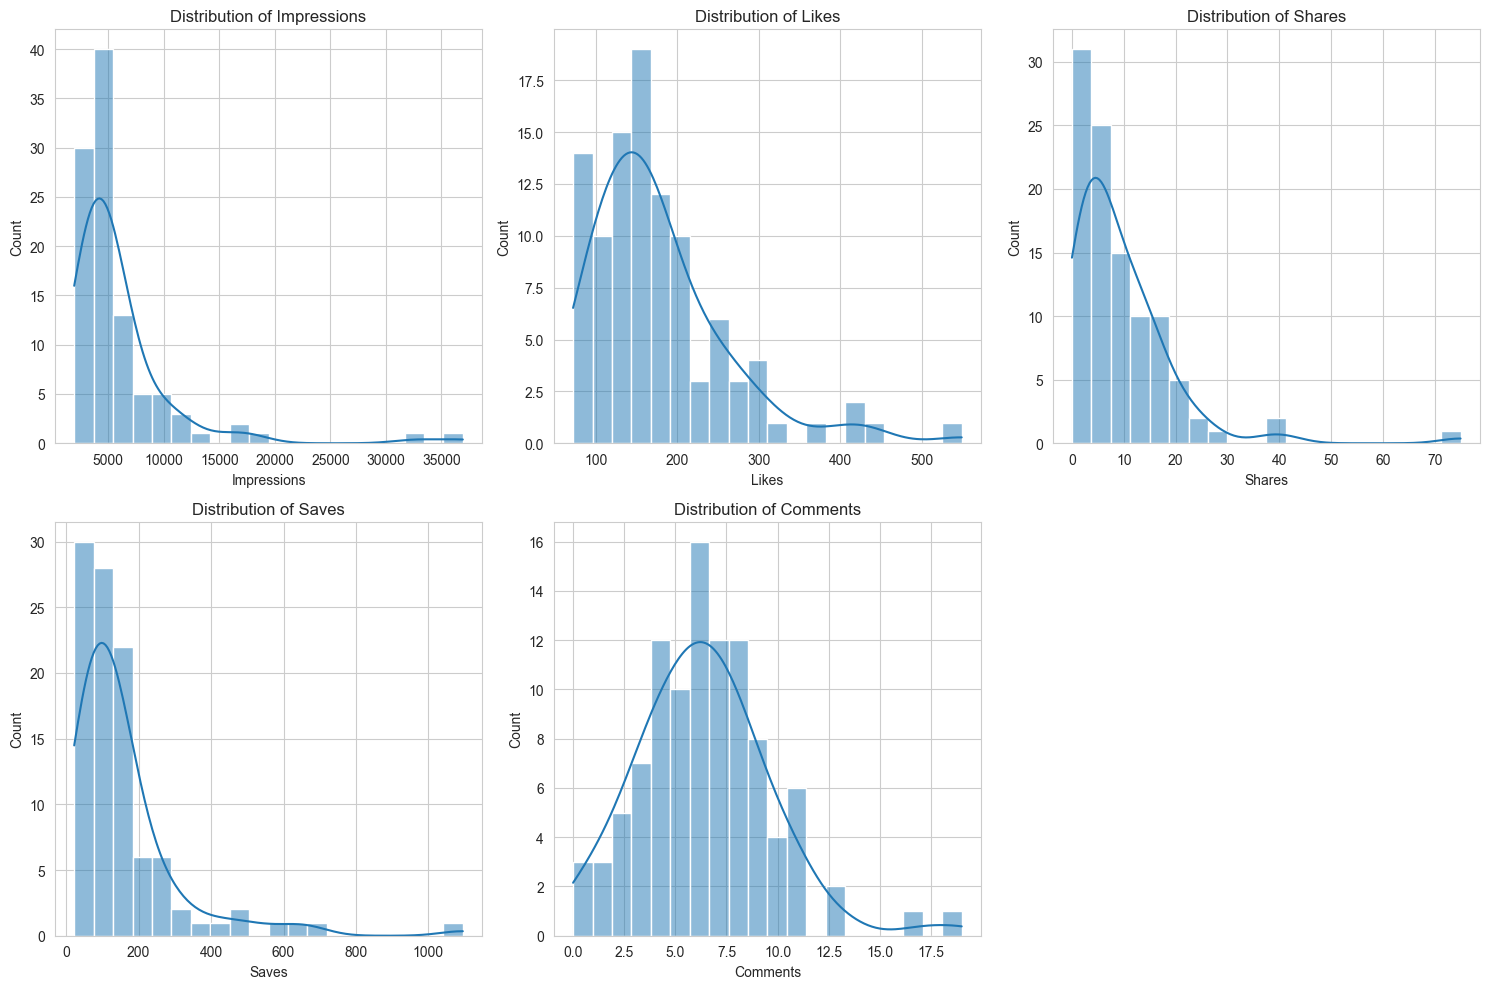

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

metrics=["Impressions","Likes","Shares","Saves","Comments"]
for i , metric in enumerate(metrics,1):
    plt.subplot(2,3,i)
    sns.histplot(df[metric],kde=True,bins=20)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)

plt.tight_layout()
plt.show()



### Impressions
The distribution shows a strong right-skewed pattern with the majority of posts receiving between 2,500-7,500 impressions. There's a notable spike in the lowest bin (around 2,500 impressions) with approximately 40 posts, suggesting many posts have relatively low reach. A long tail extends to 35,000+ impressions, indicating some high-performing outlier posts.

### Likes
The likes distribution follows a roughly normal pattern centered around 150-200 likes, which is the most common engagement level. The distribution is relatively symmetric with a slight right skew. Most posts (approximately 70-80%) receive between 100-250 likes, with fewer posts achieving 300+ likes. This bell-curve shape suggests consistent, predictable engagement patterns.

### Shares
Shares exhibit a heavily right-skewed distribution with the peak at 0-5 shares (approximately 31 posts). This indicates that most content is not widely shared, which is typical for social media. The distribution shows a rapid decline, with very few posts achieving more than 30 shares. A few outliers reach 40-70 shares, representing exceptionally viral content.

### Saves
Similar to shares, saves show a pronounced right-skewed distribution concentrated in the 0-200 range. The peak occurs around 100 saves with approximately 30 posts. This metric drops off sharply, indicating that while some users bookmark content, most posts receive minimal saves. The long tail extends to 1,000+ saves for rare high-value posts.

### Comments
Comments display a relatively normal distribution centered around 5-7 comments per post. This is the most balanced distribution among all metrics. Most posts (approximately 75%) receive between 3-10 comments, suggesting moderate but consistent community interaction. The distribution shows fewer extreme outliers compared to other metrics, with a gentle tail extending to 17-20 comments.

## Overall Patterns
All metrics except likes show right-skewed distributions, indicating that most posts perform at modest levels with occasional high performers driving the tail. This is characteristic of social media engagement where a small percentage of content generates disproportionate engagement (following power law dynamics).

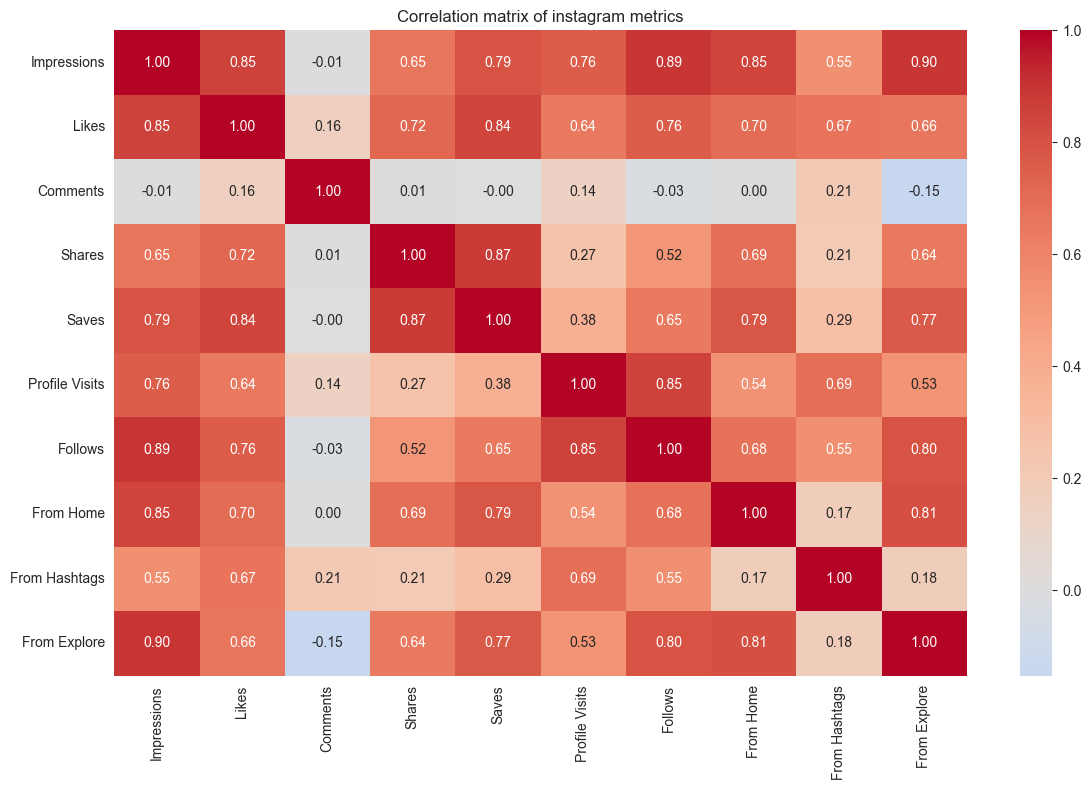

In [83]:
plt.figure(figsize=(12,8))
correlation_cols=['Impressions', 'Likes', 'Comments', 'Shares', 'Saves', 
                    'Profile Visits', 'Follows', 'From Home', 'From Hashtags', 
                    'From Explore']
correlation_matrix=df[correlation_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation matrix of instagram metrics')
plt.tight_layout()
plt.show()


## Strong Positive Correlations (0.80+)

**Impressions-related:**
- Impressions ↔ From Explore (0.90): Posts featured on Explore page drive massive reach
- Impressions ↔ Follows (0.89): High impression posts significantly boost follower growth
- Impressions ↔ Likes (0.85): Greater visibility directly translates to more likes
- Impressions ↔ From Home (0.85): Home feed placement is crucial for reach

**Engagement clusters:**
- Shares ↔ Saves (0.87): Users who share content also tend to save it, indicating highly valuable content
- Profile Visits ↔ Follows (0.85): Profile visits are strong predictors of new followers
- Likes ↔ Saves (0.84): Content that gets saved also receives more likes

## Moderate Correlations (0.60-0.79)

**Content discovery:**
- Saves ↔ Impressions (0.79): Saved content gets amplified by the algorithm
- Saves ↔ From Home (0.79): Home feed drives content worth saving
- Saves ↔ From Explore (0.77): Explore page surfaces save-worthy content

**Engagement patterns:**
- Likes ↔ Shares (0.72): Popular content tends to be shared more
- Follows ↔ Likes (0.76): Higher engagement posts convert to followers

## Weak/No Correlations (< 0.30)

**Comments stand alone:**
- Comments show near-zero correlation with most metrics (range: -0.15 to 0.21)
- Comments appear independent of reach and other engagement forms
- Suggests comments represent a distinct type of engagement (quality over quantity)

**Hashtag discovery:**
- From Hashtags shows weaker correlations (0.17-0.69) compared to Home/Explore
- Hashtags are less predictive of overall post success

## Key Strategic Insights

1. **Algorithmic amplification:** The strong Impressions-Explore-Follows chain (0.90, 0.89) shows that getting featured on Explore is the holy grail for growth

2. **Save-focused strategy:** Saves correlate strongly with shares (0.87) and impressions (0.79), making "save-worthy" content crucial for algorithmic favor

3. **Profile optimization matters:** The strong Profile Visits ↔ Follows correlation (0.85) means your profile must convert visitors effectively

4. **Comments ≠ Growth:** Despite being engagement, comments barely correlate with reach or growth metrics, suggesting they're more about community than algorithm

5. **Discovery hierarchy:** From Explore (0.90) > From Home (0.85) > From Hashtags (0.55) in terms of impression impact

6. **Engagement begets engagement:** The interconnected web of likes, shares, and saves (0.72-0.87) creates a multiplier effect for successful posts

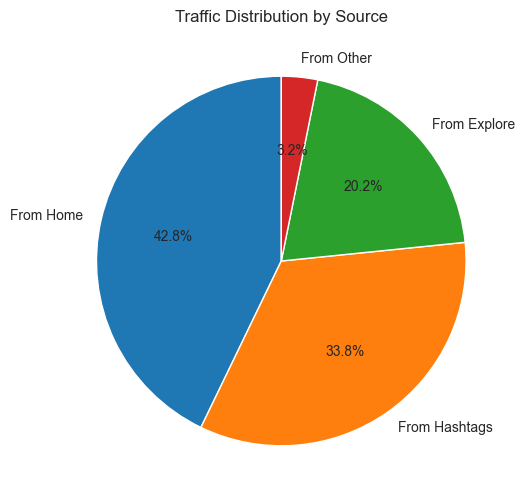

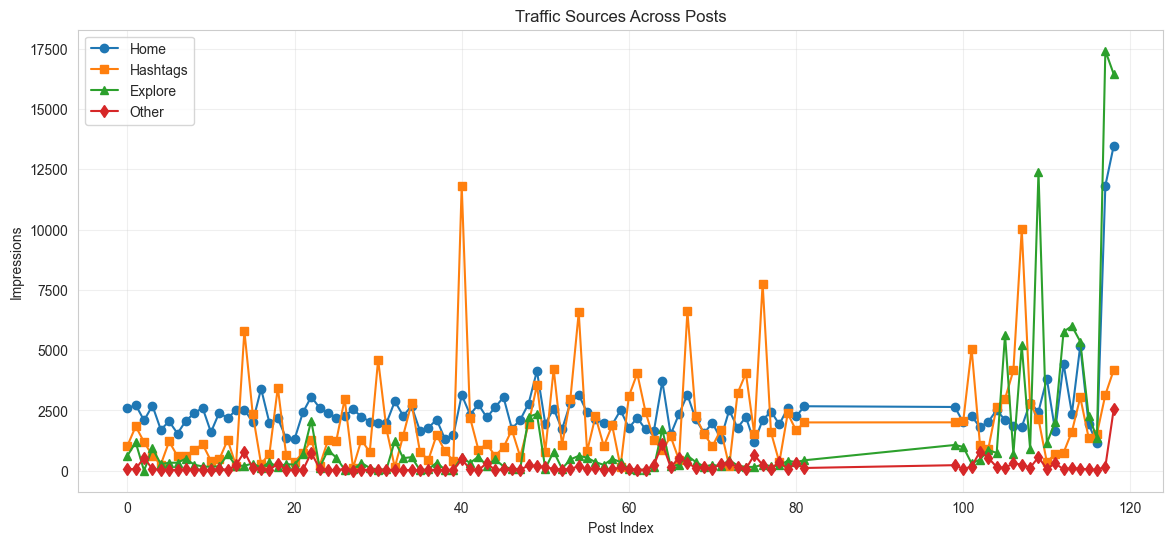

In [84]:
# Traffic sources pie chart
traffic_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
traffic_totals = df[traffic_sources].sum()

plt.figure(figsize=(10, 6))
plt.pie(traffic_totals, labels=traffic_sources, autopct='%1.1f%%', startangle=90)
plt.title('Traffic Distribution by Source')
plt.show()

# Traffic sources over posts
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['From Home'], label='Home', marker='o')
plt.plot(df.index, df['From Hashtags'], label='Hashtags', marker='s')
plt.plot(df.index, df['From Explore'], label='Explore', marker='^')
plt.plot(df.index, df['From Other'], label='Other', marker='d')
plt.xlabel('Post Index')
plt.ylabel('Impressions')
plt.title('Traffic Sources Across Posts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Traffic distribution by source
The 43% Home vs. 54% Discovery (Hashtags + Explore) split indicates a healthy balance between serving your existing community and reaching new audiences, which is ideal for sustainable growth.

### Traffic sources across the posts
The 80/20 rule in action: Approximately 5-7% of posts (6-8 posts out of ~125) drive the majority of total reach through Explore and Hashtag breakthroughs.
Viral posts cluster: High-performing posts appear in groups (posts 105-120), suggesting either:

Algorithmic momentum carrying between posts
A successful content strategy period
Seasonal/trending topic alignment

Discovery is multiplicative: When Hashtags OR Explore spike, Home traffic also increases, showing that discovery feeds back into follower engagement.
Content consistency pays off: The stable Home baseline (2,000-3,000) across 125 posts shows reliable follower retention despite variable viral performance.

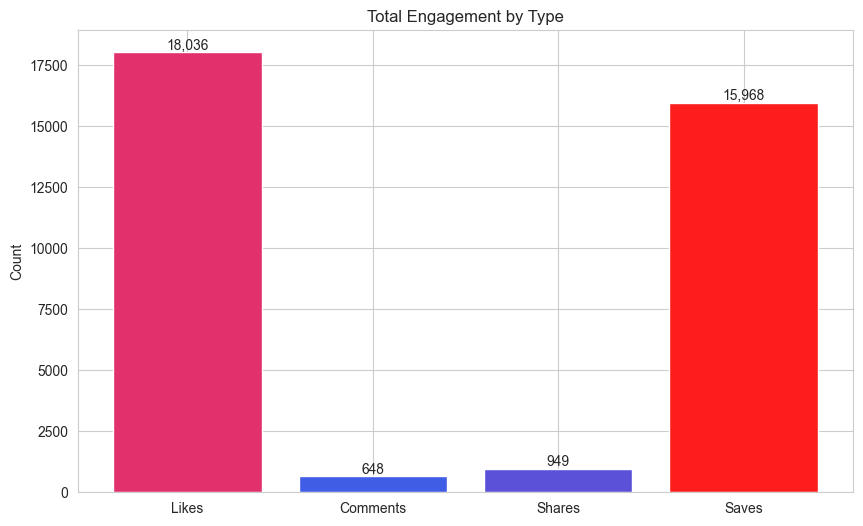

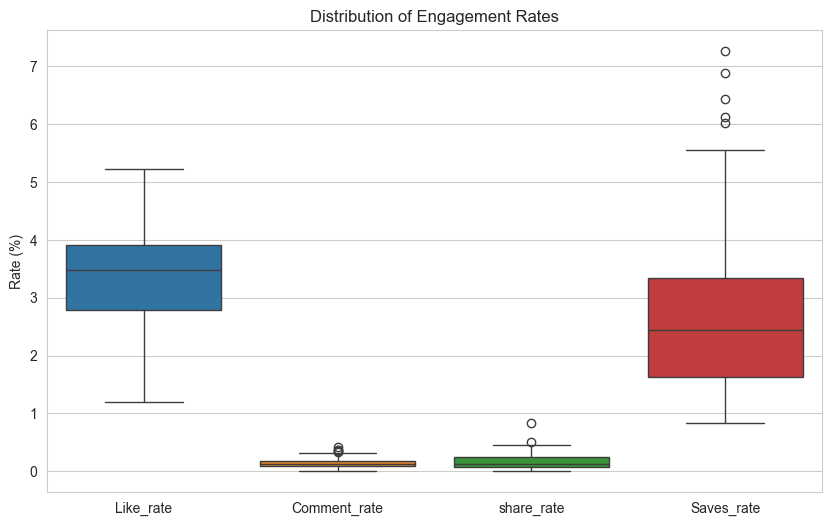

In [85]:
# Engagement breakdown
engagement_types = ['Likes', 'Comments', 'Shares', 'Saves']
engagement_totals = df[engagement_types].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(engagement_types, engagement_totals, color=['#E1306C', '#405DE6', '#5B51D8', '#FD1D1D'])
plt.title('Total Engagement by Type')
plt.ylabel('Count')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')
plt.show()

# Engagement rate distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Like_rate', 'Comment_rate', 'share_rate', 'Saves_rate']])
plt.title('Distribution of Engagement Rates')
plt.ylabel('Rate (%)')
plt.show()


## Total Engagement Volume

### Likes Dominate (18,036)
- Represents the primary form of engagement, accounting for roughly **51% of total interactions**
- The easiest, lowest-friction engagement action
- High volume indicates broad appeal but shallow commitment

### Saves Are Nearly Equal (15,968)
- Surprisingly close to likes at **45% of total engagement**
- Only 2,068 fewer than likes (11% difference)
- Indicates exceptionally valuable, reference-worthy content
- **This is unusual and highly positive** - most accounts see saves at 10-20% of likes

### Shares Are Low (949)
- Only **2.7% of total engagement**
- Significantly lower than saves, despite saves typically being the rarest action
- Suggests content is valuable for personal use but not seen as share-worthy with others
- Potential opportunity for creating more "viral" or conversation-starting content

### Comments Are Minimal (648)
- Just **1.8% of total engagement**
- Lowest of all metrics, confirming the correlation matrix insight
- Indicates passive consumption rather than active conversation
- Could signal need for more community-building or question-prompting content

## Engagement Rate Distribution 

### Like Rate (Blue): 3.0-4.0% typical
- **Median: ~3.5%**
- Relatively tight distribution (1.2-5.2% range)
- Consistent performance across posts
- Industry standard for Instagram is 1-3%, so this is **above average**

### Save Rate (Red): Highly Variable Champion
- **Median: ~2.5%**
- Widest distribution with significant outliers up to **7.3%**
- Many posts in the 1.5-3.5% range, but frequent high performers
- Some posts are extremely save-worthy (6-7% rate is exceptional)
- Typical Instagram save rates are 0.5-1%, so **2.5% median is outstanding**

### Comment Rate (Orange): Consistently Low
- **Median: ~0.15%**
- Tightly clustered near zero with minimal variation
- Multiple outliers around 0.4-0.5% (still very low)
- Confirms comments are not a strength of this account
- Industry standard is 0.5-1%, so this is **below average**

### Share Rate (Green): Minimal and Consistent
- **Median: ~0.2%**
- Extremely tight distribution, almost no outliers
- Very predictable but universally low
- Suggests content isn't prompting "tag a friend" or reshare behavior
- Typical rates are 0.1-0.3%, so this is **at the lower end of normal**

## Critical Strategic Insights

### The Save-to-Like Ratio Is Exceptional
- **Save rate (2.5%) is 71% of like rate (3.5%)** - this is extraordinary
- Normal accounts see saves at 10-30% of like rate
- Indicates your content has high perceived value and utility
- Users are bookmarking for future reference, tutorials, inspiration, or purchases

### Engagement Quality Over Quantity
- High saves + low shares/comments = **"personal vault" content**
- People value it individually but don't discuss or share socially
- Content likely serves: educational tutorials, aesthetic inspiration, product info, or personal development

### The Outlier Opportunity
- Several posts achieve 6-7% save rates (triple the median)
- These exceptional performers should be analyzed and replicated
- They represent your "signature content" that provides maximum value

### Community Engagement Gap
- Comments (0.15%) and shares (0.2%) are both significantly below platform averages
- This creates a growth ceiling since algorithmic amplification rewards conversation
- The account excels at value delivery but lacks community interaction

In [ ]:
# Top 10 posts by impressions
top_posts_impressions = df.nlargest(10, 'Impressions')[['Caption', 'Impressions', 
                                                           'Engagement_rate', 'Likes', 'Saves']]
print("\nTop 10 Posts by Impressions:")
print(top_posts_impressions)






Top 10 Posts by Impressions:
                                               Caption  Impressions  \
118  175 Python Projects with Source Code solved an...        36919   
117  Here are some of the best data science certifi...        32695   
109  Here are some of the best resources to learn S...        17713   
107  Here is a list of 100+ Machine Learning Algori...        17396   
40   280 Machine Learning Projects Solved & Explain...        16062   
114  Here are some of the best data science certifi...        13700   
112  Python is one of the best programming language...        11149   
105  Here are some of the best data science project...        11068   
67   170 Python Projects with Source Code solved an...        10933   
54   170 Python Projects with Source Code solved an...        10667   

     Engagement_rate  Likes  Saves  
118         3.052629    443    653  
117         5.263802    549   1095  
109         4.730989    308    504  
107         4.110140    416    285  
40 

In [90]:
# Posts that drove most follows
top_posts_follows = df.nlargest(10, 'Follows')[['Caption', 'Impressions', 'Follows', 
                                                  'Profile Visits']]
print("\nTop 10 Posts by Follows:")
print(top_posts_follows)


Top 10 Posts by Follows:
                                               Caption  Impressions  Follows  \
107  Here is a list of 100+ Machine Learning Algori...        17396      260   
118  175 Python Projects with Source Code solved an...        36919      228   
117  Here are some of the best data science certifi...        32695      214   
22   Learn how to send automatic emails using the P...         7281      100   
113  Practice these 90+ Data Science Projects For B...        10206      100   
109  Here are some of the best resources to learn S...        17713       96   
40   280 Machine Learning Projects Solved & Explain...        16062       94   
67   170 Python Projects with Source Code solved an...        10933       94   
114  Here are some of the best data science certifi...        13700       80   
54   170 Python Projects with Source Code solved an...        10667       74   

     Profile Visits  
107             467  
118             611  
117             148  
22   

In [91]:
# Top 10 posts by engagement rate
top_posts_engagement = df.nlargest(10, 'Engagement_rate')[['Caption', 'Impressions', 
                                                             'Engagement_rate', 'Likes', 'Saves']]
print("\nTop 10 Posts by Engagement Rate:")
print(top_posts_engagement)


Top 10 Posts by Engagement Rate:
                                               Caption  Impressions  \
99   Here is a complete roadmap to data science tha...         5409   
45   Here are some of the best Python project ideas...         4298   
81   Here is a complete roadmap to data science tha...         5273   
108  Here are some of the best websites that you ca...         6814   
49   Here are some of the best websites that you ca...        10386   
64   Here are some of the very useful Python script...         7571   
59   Here are some of the best websites to prepare ...         3246   
72   Here are some of the best websites to prepare ...         3606   
11   Heres how to get the live stock price data of...         3234   
4    Plotting annotations while visualizing your da...         2518   

     Engagement_rate  Likes  Saves  
99         13.033833    275    393  
45         11.935784    225    263  
81         11.359757    250    318  
108        10.977399    249    469  

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clustering_features=["Engagement_rate","Saves_rate","ProfileVisit_rate","From_Home_rate","From Explore_rate"]
X=df[clustering_features].fillna(0)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

inertias=[]
for k in range(2,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2,8),inertias,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title('Elobow Method for optimal clusters')
plt.grid(True,alpha=0.3)
plt.show()




NameError: name 'df' is not defined

In [102]:
# Apply clustering (let's use 3 clusters as example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
print("\nCluster Analysis:")
for cluster in range(4):
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Number of posts: {len(cluster_data)}")
    print(f"Average Engagement Rate: {cluster_data['Engagement_rate'].mean():.2f}%")
    print(f"Average Impressions: {cluster_data['Impressions'].mean():.0f}")
    print(f"Average Saves: {cluster_data['Saves'].mean():.1f}")


Cluster Analysis:

--- Cluster 0 ---
Number of posts: 21
Average Engagement Rate: 4.19%
Average Impressions: 6482
Average Saves: 85.1

--- Cluster 1 ---
Number of posts: 12
Average Engagement Rate: 4.45%
Average Impressions: 14403
Average Saves: 347.7

--- Cluster 2 ---
Number of posts: 59
Average Engagement Rate: 6.80%
Average Impressions: 4010
Average Saves: 112.0

--- Cluster 3 ---
Number of posts: 10
Average Engagement Rate: 10.22%
Average Impressions: 5830
Average Saves: 340.3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

features = ['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Impressions']
target='total_engagement'

X=df[features]
y=df[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(f"\n Model Performance:")
print(f"R^2 Score:{r2_score(y_test,y_pred):.3f}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")



 M odel Performance:
R^2 Score:0.632
RMSE:214.86



Feature Importance:
         Feature  Importance
4    Impressions    0.470114
0      From Home    0.295727
2   From Explore    0.109031
3     From Other    0.069459
1  From Hashtags    0.055669


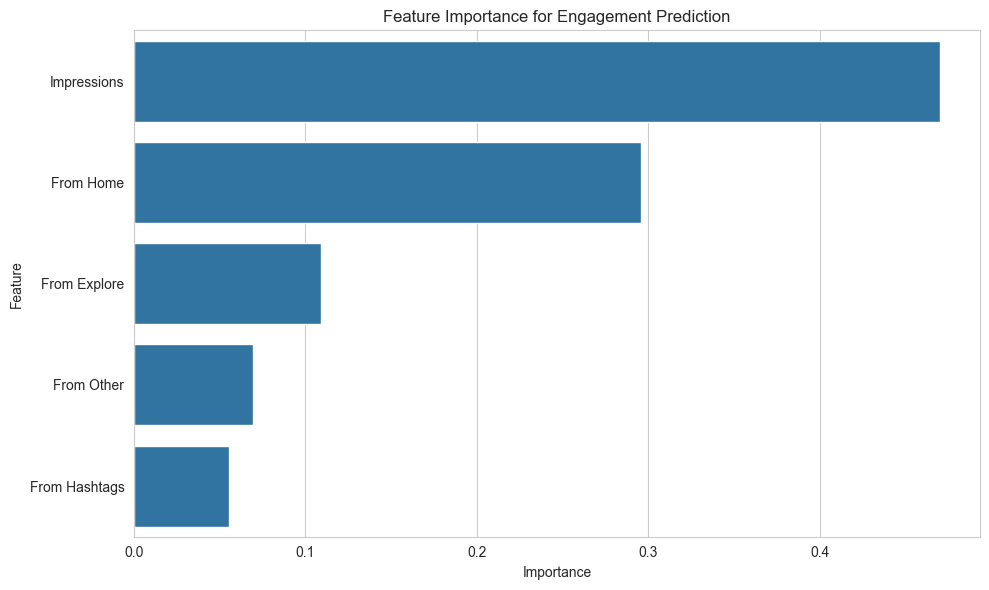

In [105]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance for Engagement Prediction')
plt.tight_layout()
plt.show()


Caption Metrics Correlation with Engagement:
Caption Length vs Engagement Rate: -0.252
Word Count vs Engagement Rate: -0.224


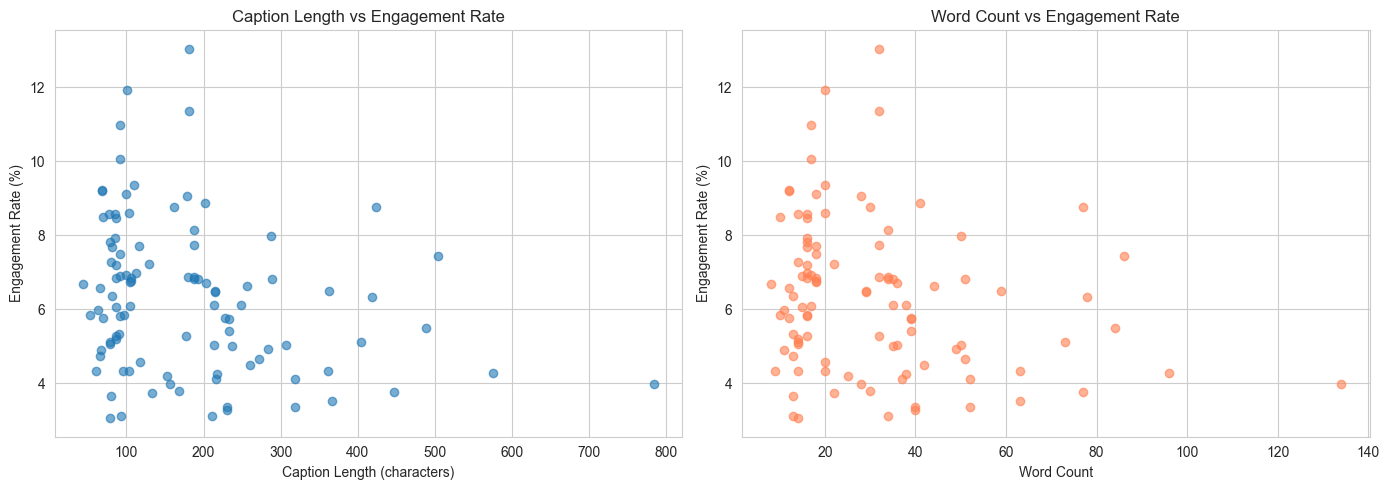


Optimal Caption Length Statistics (Top 20% posts):
count     20.000000
mean     142.650000
std       88.475554
min       68.000000
25%       86.500000
50%      102.000000
75%      181.000000
max      424.000000
Name: Caption_Length, dtype: float64


In [107]:
# Caption length analysis
df['Caption_Length'] = df['Caption'].str.len()
df['Word_Count'] = df['Caption'].str.split().str.len()

# Correlation with engagement
print("\nCaption Metrics Correlation with Engagement:")
print(f"Caption Length vs Engagement Rate: {df['Caption_Length'].corr(df['Engagement_rate']):.3f}")
print(f"Word Count vs Engagement Rate: {df['Word_Count'].corr(df['Engagement_rate']):.3f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['Caption_Length'], df['Engagement_rate'], alpha=0.6)
axes[0].set_xlabel('Caption Length (characters)')
axes[0].set_ylabel('Engagement Rate (%)')
axes[0].set_title('Caption Length vs Engagement Rate')

axes[1].scatter(df['Word_Count'], df['Engagement_rate'], alpha=0.6, color='coral')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Engagement Rate (%)')
axes[1].set_title('Word Count vs Engagement Rate')

plt.tight_layout()
plt.show()

# Optimal caption length range
optimal_length = df.nlargest(20, 'Engagement_rate')['Caption_Length'].describe()
print("\nOptimal Caption Length Statistics (Top 20% posts):")
print(optimal_length)

In [118]:
# Create comprehensive insights report
print("\n" + "="*80)
print("INSTAGRAM PERFORMANCE INSIGHTS REPORT")
print("="*80)

print("\n1. OVERALL PERFORMANCE")
print(f"   • Total Posts Analyzed: {len(df)}")
print(f"   • Average Impressions per Post: {df['Impressions'].mean():.0f}")
print(f"   • Average Engagement Rate: {df['Engagement_rate'].mean():.2f}%")
print(f"   • Average Saves per Post: {df['Saves'].mean():.1f}")
print(f"   • Total Follows Generated: {df['Follows'].sum()}")

print("\n2. TRAFFIC SOURCE ANALYSIS")
dominant_source = traffic_totals.idxmax()
print(f"   • Primary Traffic Source: {dominant_source} ({traffic_totals[dominant_source]/traffic_totals.sum()*100:.1f}%)")
print(f"   • Explore Page Reach: {df['From Explore'].sum()} ({df['From Explore_rate'].mean():.1f}% average)")

print("\n3. ENGAGEMENT PATTERNS")
print(f"   • Posts with >5% Engagement Rate: {(df['Engagement_rate'] > 5).sum()}")
print(f"   • Average Save Rate: {df['Saves_rate'].mean():.2f}%")
print(f"   • Strongest Correlation with Impressions: ", end="")
correlations = df[['Likes', 'Comments', 'Shares', 'Saves']].corrwith(df['Impressions']).sort_values(ascending=False)
print(f"{correlations.index[0]} (r={correlations.values[0]:.3f})")

print("\n4. CONTENT PERFORMANCE")
high_performers = df[df['Engagement_rate'] > df['Engagement_rate'].quantile(0.75)]
print(f"   • Top 25% posts average impressions: {high_performers['Impressions'].mean():.0f}")
print(f"   • Optimal caption length range: {optimal_length['25%']:.0f}-{optimal_length['75%']:.0f} characters")

print("\n5. GROWTH INDICATORS")
print(f"   • Average Profile Visits per Post: {df['Profile Visits'].mean():.1f}")
print(f"   • Conversion Rate (Visits to Follows): {(df['Follows'].sum()/df['Profile Visits'].sum()*100):.2f}%")

print("\n6. RECOMMENDATIONS")
if df['From Explore_rate'].mean() < 10:
    print("   • Increase hashtag optimization to improve Explore page reach")
if df['Saves_rate'].mean() < 2:
    print("   • Create more saveable content (tutorials, infographics, valuable tips)")
if df['Comment_rate'].mean() < 1:
    print("   • Increase calls-to-action and questions to boost comment engagement")
if df['Follows_rate'].mean() < 1:
    print("   • Optimize bio and content to convert profile visitors to followers")

print("\n" + "="*80)


INSTAGRAM PERFORMANCE INSIGHTS REPORT

1. OVERALL PERFORMANCE
   • Total Posts Analyzed: 102
   • Average Impressions per Post: 5920
   • Average Engagement Rate: 6.32%
   • Average Saves per Post: 156.5
   • Total Follows Generated: 2328

2. TRAFFIC SOURCE ANALYSIS
   • Primary Traffic Source: From Home (42.8%)
   • Explore Page Reach: 120214 (12.9% average)

3. ENGAGEMENT PATTERNS
   • Posts with >5% Engagement Rate: 73
   • Average Save Rate: 2.64%
   • Strongest Correlation with Impressions: Likes (r=0.853)

4. CONTENT PERFORMANCE
   • Top 25% posts average impressions: 4858
   • Optimal caption length range: 86-181 characters

5. GROWTH INDICATORS
   • Average Profile Visits per Post: 54.7
   • Conversion Rate (Visits to Follows): 41.75%

6. RECOMMENDATIONS
   • Increase calls-to-action and questions to boost comment engagement
   • Optimize bio and content to convert profile visitors to followers

